## Readreflex example usage

In [1]:
## Basic imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt


The central strucuture revolves around the "radargram" object that provides reading, plotting and writing routines

In [2]:
from readreflex.readreflex import radargram

Create the object: 

In [3]:
radardata=radargram()

No file format was given, assuming .par


We provide some example data. It is 2 GHz horn antenna data measured with a GSSI system, imported into ReflexW

In [4]:
filepath=r'exampledata\testdata.DAT'

In general, reading RefelxW-Data is really really slow as we have to do bytewise decoding of data, trace by trace and that isn't parallelized yet, so for speed, we convert the data to hdf5 after reading it. 
So let's read. 

In [5]:
if os.path.isfile(filepath+'.hdf5'):
    radardata.load_hdf5(filepath)
else:
    radardata.read_data_file(filepath,version=9)
    radardata.save(filepath)

Looking for exampledata\testdata.DAT.hdf5
Found and loaded the file!


The library prints out some basic values upon reading the file. 
What's more important: 

### A version needs to be given. 

At some point, ReflexW changed the structure of its byte ordering. 
This had nothing to do with int or float usage, it's the way the values are aranged within the file format. 
Since most of that is undocumented, lots of the reading routines rely on reading hex-values and a bit of guesswork. 

#### Next up is plotting:

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Tracenumber', ylabel='t'>)

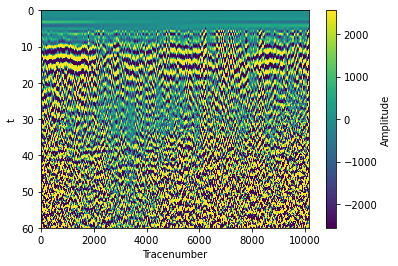

In [6]:
radardata.radarplot()

Plotting with different plotting parameters: 

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='Distance [m]', ylabel='t'>)

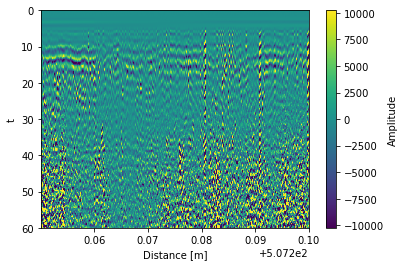

In [7]:
radardata.radarplot(contrast=1,short=False,distanceplot=True)

Accessing the data directly gives the "inherited" numpy array including all methods

In [8]:
(radardata.traces[0,1],radardata.traces[0,1:10],radardata.traces[0,:].shape)

(0.0,
 array([  0.,   5.,   9.,  12.,  12.,  16.,  14.,  11.,   9.], dtype=float32),
 (512,))

Plotting through accessing the array directly, be aware of the need to swap axes:

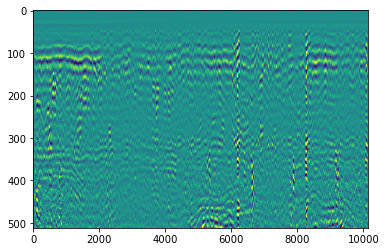

In [9]:
maxmin=np.percentile(radardata.traces,98)
plt.imshow(radardata.traces.T,aspect='auto',vmin=maxmin*-1,vmax=maxmin)